#  Применимость методов анализа

Автор: Никоноров Е.Н.
Дата: 21.11.2022
Курс: Аналитик данных (Data scientist) 2022
Кейс: №3 «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»

Искомые параметры: 
1.Width
2.Depth


Описание файла:
1. Загружаем данные из initail, merged, generated 
2. Формируем X, y 
3. Разделяем на обучающую и тестовую выборки
4. Линейная регрессия
5. Деревья
6. Сети
8. Выбор целевого метода

In [17]:
#импорт библиотек

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import recall_score


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



from sklearn.preprocessing import scale
from sklearn import set_config 

In [38]:
#загрузка данных
df_merged = pd.read_excel("../Data/ds_merged.xlsx ")
df_merged = df_merged.drop(['Unnamed: 0'], axis =1)

df_initial = pd.read_excel("../Data/ds_initial.xlsx ")
df_initial = df_initial.drop(['Unnamed: 0'], axis =1)

df_generated = pd.read_excel("../Data/ds_generated.xlsx ")
df_generated = df_generated.drop(['Unnamed: 0'], axis =1)

 

In [46]:

#менять датасет тут
df = df_merged

X=df.iloc[:,:4].to_numpy()
y=df.iloc[:,4:].to_numpy()



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [48]:

def plot_result(y_train,y_train_pred, y_test, y_pred):
    fig,axs = plt.subplots(figsize=(16,4), ncols=3)
    axs[0].scatter(y_train, y_train_pred)
    axs[0].set_title('train data')

    axs[1].scatter(y_pred, y_test, label="test data")
    axs[1].set_title('test data')
    err=y_pred - y_test
    axs[2].scatter(err[:,0], err[:,1], label="error")
    axs[2].set_title('error (test)')

    print('mse', mean_squared_error(y_test,y_pred))
    print('mae', mean_absolute_error(y_test,y_pred))
    print('Coef of determination', r2_score(y_test,y_pred))
    #reg.score(X_test, y_test)

    #((y_test-y_pred) ** 2).mean()

#     Линейная регрессия
    

mse 0.009184480376476326
mae 0.07164774454917298
Coef of determination 0.8013173549034844


array([0.7863517 , 0.76685341, 0.77752661, 0.77061049, 0.82784119])

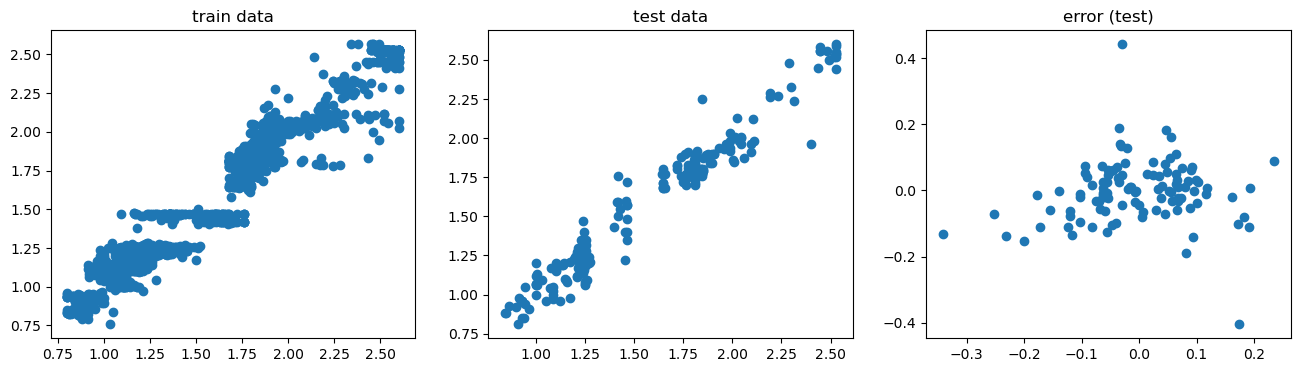

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

plot_result(y_train,y_train_pred, y_test, y_pred)


cross_val_score(reg, X, y)

# Support Vector Regression

In [50]:
#from sklearn.svm import SVR

#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

#y_train_0 = y_train[:,0]
#y_train_1 = y_train[:,1]

#y_test_0 = y_test[:,0]
#y_test_1 = y_test[:,1]

#reg = svr_rbf.fit(X_train, y_train_0)
#y_pred = reg.predict(X_test)

#plot_result(y_train_0, y_test_0, y_pred)

rbf
mse 0.007195057761089623
mae 0.058464714305945145
Coef of determination 0.861349587381


array([0.85748376, 0.82866478, 0.78586122, 0.84181989, 0.71161816,
       0.85916017, 0.87701682, 0.81090917, 0.81458997, 0.8562764 ])

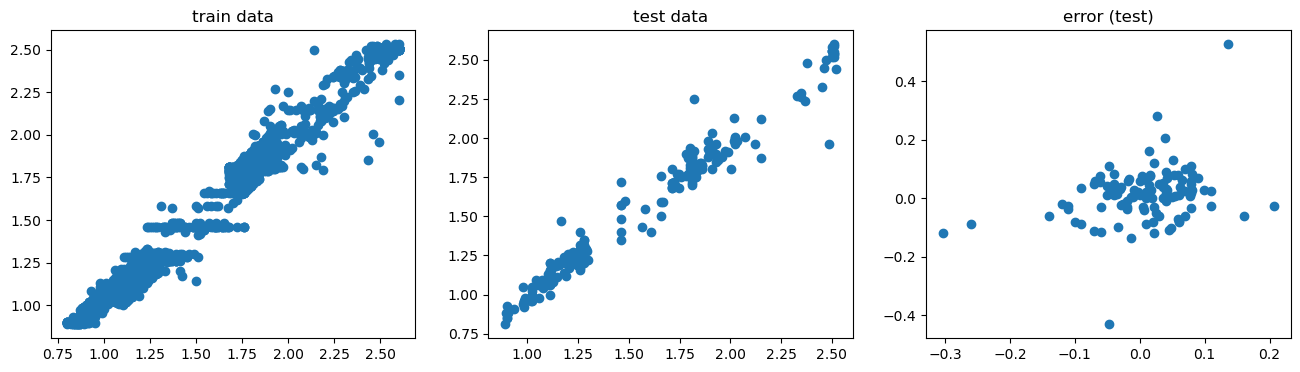

In [51]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

print('rbf')
multiSvr = MultiOutputRegressor(svr_rbf)
reg = multiSvr.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)
cross_val_score(reg, X, y, cv=10)

#работает долго и менее точно
#print('lin')
#multiSvr = MultiOutputRegressor(svr_lin)
#reg = multiSvr.fit(X_train, y_train)
#y_train_pred = reg.predict(X_train)
#y_pred = reg.predict(X_test)
#plot_result(y_train,y_train_pred, y_test, y_pred)

#виснет на сгенерированном датасете
#print('poly')
#multiSvr = MultiOutputRegressor(svr_poly)
#reg = multiSvr.fit(X_train, y_train)
#y_train_pred = reg.predict(X_train)
#y_pred = reg.predict(X_test)
#plot_result(y_train,y_train_pred, y_test, y_pred)



# RandomForest

rf
mse 0.006230876301663955
mae 0.049378274035603305
Coef of determination 0.8803247106377058


array([0.91324711, 0.87384937, 0.82321204, 0.85718309, 0.89660815,
       0.89030005, 0.8980671 , 0.84111016, 0.87489061, 0.8844975 ])

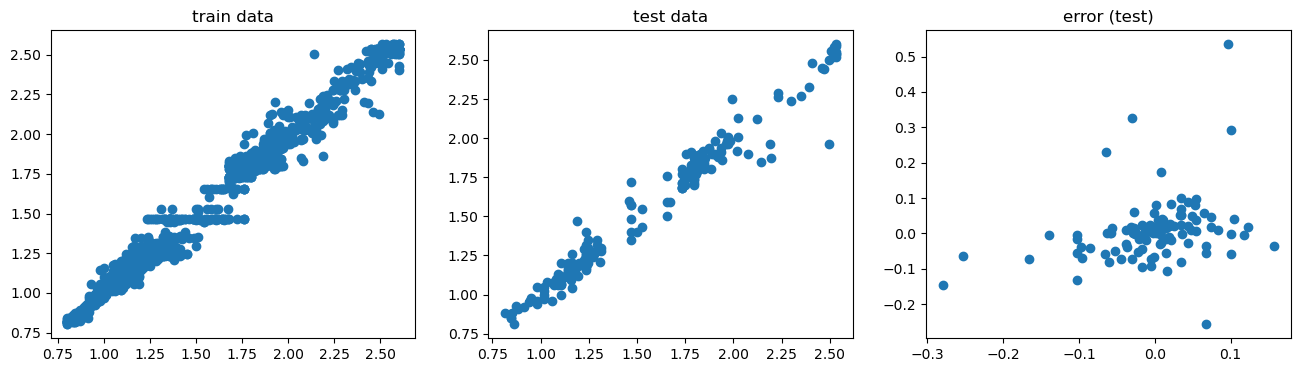

In [52]:
max_depth = 20

print('rf')
multi = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0))
reg = multi.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)

cross_val_score(reg, X, y, cv=10, scoring = 'r2')


# Дерево решений

Dtree
mse 0.006992848178525909
mae 0.054203910809631134
Coef of determination 0.8613404022574938


array([0.91017421, 0.85833742, 0.80909226, 0.80411771, 0.87392391,
       0.86627262, 0.89401973, 0.82364866, 0.80910675, 0.86992933])

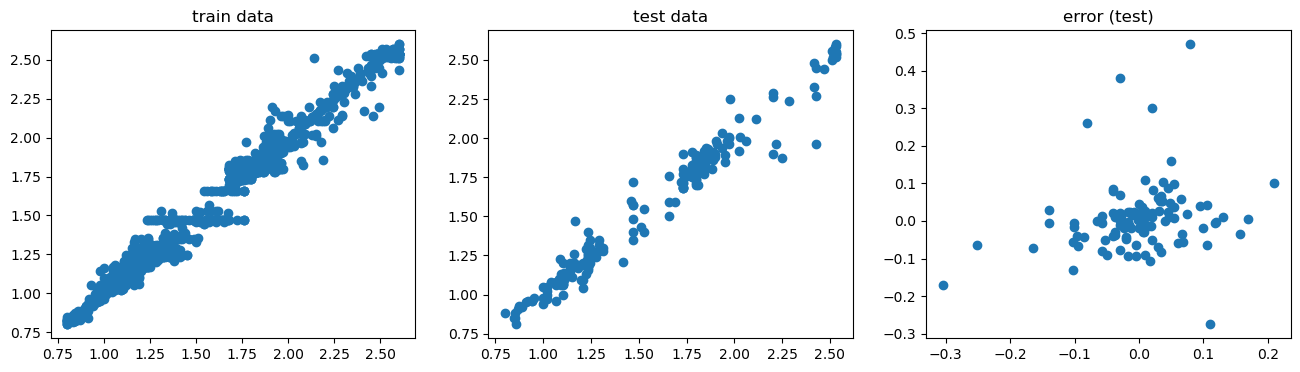

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


print('Dtree')
multi = MultiOutputRegressor(DecisionTreeRegressor(random_state=42, max_depth=max_depth))
reg = multi.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)

cross_val_score(reg, X, y, cv=10)

# Multi-layer Perceptron regressor

Multi-layer Perceptron
mse 0.010854084082740925
mae 0.07602147013309388
Coef of determination 0.7755625500995522


array([0.75365249, 0.73912677, 0.69873948, 0.73842131, 0.76255433,
       0.79490976, 0.82186914, 0.65876759, 0.67396486, 0.81753858])

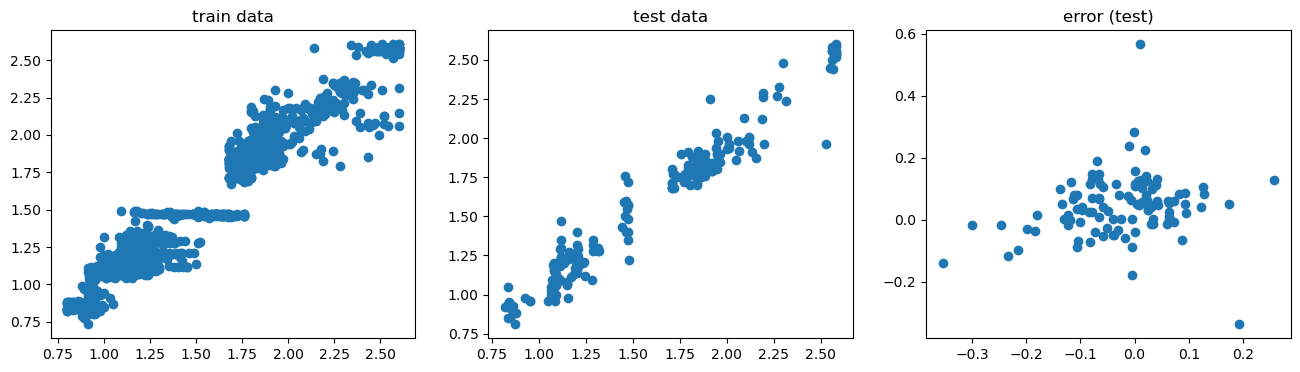

In [54]:
from sklearn.neural_network import MLPRegressor


print('Multi-layer Perceptron')
mlp = MLPRegressor(random_state=13, max_iter=1500, batch_size=50  )
reg = mlp.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
plot_result(y_train,y_train_pred, y_test, y_pred)

mlp.hidden_layer_sizes
cross_val_score(reg, X, y, cv=10)

# Нейронная сеть

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

NN
Epoch 1/100
31/31 [==============================] - 1s 5ms/step - loss: 9.5382 - root_mean_squared_error: 3.0884
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.4271 - root_mean_squared_error: 0.6535
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2658 - root_mean_squared_error: 0.5155
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2319 - root_mean_squared_error: 0.4815
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1828 - root_mean_squared_error: 0.4275
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1435 - root_mean_squared_error: 0.3789
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1414 - root_mean_squared_error: 0.3760
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.1010 - root_mean_squared_error: 0.3179
Epoch 9/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0877 - roo

31/31 [==============================] - 0s 4ms/step - loss: 0.0827 - root_mean_squared_error: 0.2875
Epoch 73/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1251 - root_mean_squared_error: 0.3536
Epoch 74/100
31/31 [==============================] - 0s 5ms/step - loss: 0.1102 - root_mean_squared_error: 0.3319
Epoch 75/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0926 - root_mean_squared_error: 0.3043
Epoch 76/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0598 - root_mean_squared_error: 0.2445
Epoch 77/100
31/31 [==============================] - 0s 4ms/step - loss: 0.1105 - root_mean_squared_error: 0.3325
Epoch 78/100
31/31 [==============================] - 0s 4ms/step - loss: 0.1232 - root_mean_squared_error: 0.3511
Epoch 79/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2037 - root_mean_squared_error: 0.4514
Epoch 80/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0536 - root_mean_

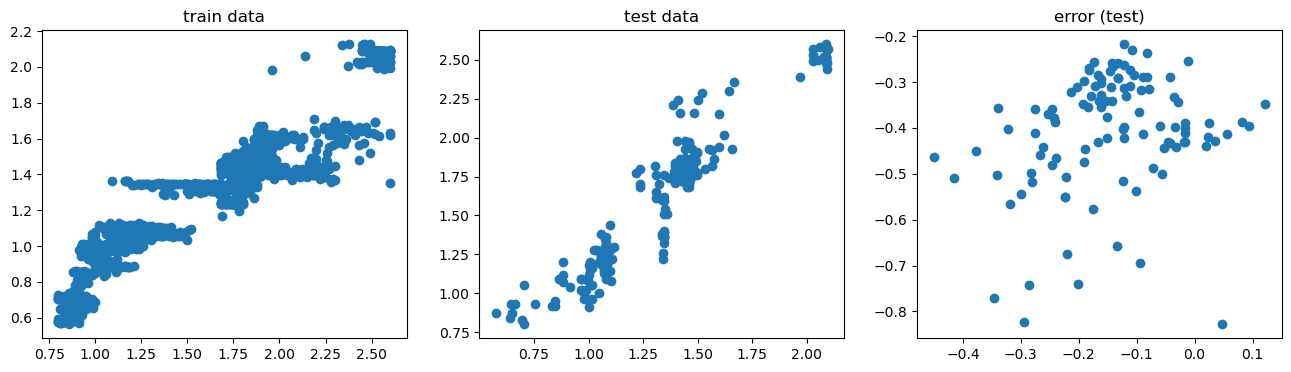

In [36]:
print('NN')

NN_m = tf.keras.Sequential()
NN_m.add(tf.keras.layers.Dense(units= 100, input_shape=(X_train.shape[1],)))
NN_m.add(tf.keras.layers.Dense(units = 100, activation = "relu"))
NN_m.add(tf.keras.layers.Dense(units = 2, activation = "linear"))

NN_m.compile(optimizer = 'Adam', loss = 'mse',
             metrics=[tf.keras.metrics.RootMeanSquaredError()])

NN_m.fit(X_train, y_train, epochs=100)

y_train_pred = NN_m.predict(X_train)
y_pred = NN_m.predict(X_test)


plot_result(y_train,y_train_pred, y_test, y_pred)



# Выводы:

In [14]:
#На начальных, генерированных и смешанных данных лучший результат показал RandomForest